# Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train = pd.read_csv("train_copy.csv")
train.shape

(554, 13)

In [3]:
train["Loan_Status"].value_counts()

Y    384
N    170
Name: Loan_Status, dtype: int64

In [4]:
train.head(2)

Loan_ID Gender Married  Dependents Education Self_Employed  \
0  LP001205   Male     Yes         0.0  Graduate            No   
1  LP001206   Male     Yes         4.0  Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             2500             3796.0       120.0             360.0   
1             3029                0.0        99.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Urban           Y

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
Loan_ID              554 non-null object
Gender               542 non-null object
Married              551 non-null object
Dependents           539 non-null float64
Education            554 non-null object
Self_Employed        527 non-null object
ApplicantIncome      554 non-null int64
CoapplicantIncome    554 non-null float64
LoanAmount           534 non-null float64
Loan_Amount_Term     544 non-null float64
Credit_History       508 non-null float64
Property_Area        554 non-null object
Loan_Status          554 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 56.3+ KB


In [6]:
test = pd.read_csv('test_data1.csv')
test.shape

(60, 13)

In [7]:
train.head()

Loan_ID  Gender Married  Dependents     Education Self_Employed  \
0  LP001205    Male     Yes         0.0      Graduate            No   
1  LP001206    Male     Yes         4.0      Graduate            No   
2  LP001207    Male     Yes         0.0  Not Graduate           Yes   
3  LP001213    Male     Yes         1.0      Graduate            No   
4  LP001222  Female      No         0.0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             2500             3796.0       120.0             360.0   
1             3029                0.0        99.0             360.0   
2             2609             3449.0       165.0             180.0   
3             4945                0.0         NaN             360.0   
4             4166                0.0       116.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Urban           Y  
2             0.0         Rural           N  
3             0.0         Rural           N  
4             0.0     Semiurban           N

In [8]:
#p=sc.inverse_transform(X_train_act[numerical_train].iloc[0].values)

In [9]:
#X_train_act.iloc[0].values.reshape(-1,1)

In [10]:
test["Credit_History"].value_counts()

1.0    48
0.0     8
Name: Credit_History, dtype: int64

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
Loan_ID              60 non-null object
Gender               59 non-null object
Married              60 non-null object
Dependents           60 non-null int64
Education            60 non-null object
Self_Employed        55 non-null object
ApplicantIncome      60 non-null int64
CoapplicantIncome    60 non-null int64
LoanAmount           58 non-null float64
Loan_Amount_Term     56 non-null float64
Credit_History       56 non-null float64
Property_Area        60 non-null object
Loan_Status          60 non-null object
dtypes: float64(3), int64(3), object(7)
memory usage: 6.2+ KB


# ** Data Cleaning and filling missing values **

In [12]:
train.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     10
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
test.apply(lambda x: sum(x.isnull()),axis=0) #checking missing values in each column of test dataset

Loan_ID              0
Gender               1
Married              0
Dependents           0
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           2
Loan_Amount_Term     4
Credit_History       4
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
train['Gender'].value_counts()

Male      440
Female    102
Name: Gender, dtype: int64

In [15]:
train.Gender = train.Gender.fillna('Male')

In [16]:
test['Gender'].value_counts()

Male      49
Female    10
Name: Gender, dtype: int64

In [17]:
test.Gender = test.Gender.fillna('Male')

In [18]:
train['Married'].value_counts()

Yes    357
No     194
Name: Married, dtype: int64

In [19]:
train.Married = train.Married.fillna('Yes')

In [20]:
test['Married'].value_counts()

Yes    41
No     19
Name: Married, dtype: int64

In [21]:
test.Married = test.Married.fillna('Yes')

In [22]:
train['Dependents'].value_counts()

0.0    309
1.0     92
2.0     89
4.0     49
Name: Dependents, dtype: int64

In [23]:
train.Dependents = train.Dependents.fillna('0')

In [24]:
test['Dependents'].value_counts()

0    36
2    12
1    10
4     2
Name: Dependents, dtype: int64

In [25]:
test.Dependents = test.Dependents.fillna('0')

In [26]:
train['Self_Employed'].value_counts()

No     451
Yes     76
Name: Self_Employed, dtype: int64

In [27]:
train.Self_Employed = train.Self_Employed.fillna('No')

In [28]:
test['Self_Employed'].value_counts()

No     49
Yes     6
Name: Self_Employed, dtype: int64

In [29]:
test.Self_Employed = test.Self_Employed.fillna('No')

In [30]:
train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean())

In [31]:
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean())

In [32]:
train['Loan_Amount_Term'].value_counts()

360.0    458
180.0     44
480.0     15
300.0     13
84.0       4
240.0      3
36.0       2
120.0      2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
train.Loan_Amount_Term = train.Loan_Amount_Term.fillna(360.0)

In [34]:
test['Loan_Amount_Term'].value_counts()

360.0    54
240.0     1
120.0     1
Name: Loan_Amount_Term, dtype: int64

In [35]:
test.Loan_Amount_Term = test.Loan_Amount_Term.fillna(360.0)

In [36]:
train['Credit_History'].value_counts()

1.0    427
0.0     81
Name: Credit_History, dtype: int64

In [37]:
train.Credit_History = train.Credit_History.fillna(1.0)

In [38]:
test['Credit_History'].value_counts()

1.0    48
0.0     8
Name: Credit_History, dtype: int64

In [39]:
test.Credit_History = test.Credit_History.fillna(1.0)

In [40]:
train.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [42]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [43]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [44]:
train = train.drop(['Loan_ID', 'Gender'], axis=1)
test = test.drop(['Loan_ID', 'Gender'], axis=1)

In [45]:
train.head()

Married Dependents     Education Self_Employed  ApplicantIncome  \
0     Yes          0      Graduate            No             2500   
1     Yes          4      Graduate            No             3029   
2     Yes          0  Not Graduate           Yes             2609   
3     Yes          1      Graduate            No             4945   
4      No          0      Graduate            No             4166   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0             3796.0  120.000000             360.0             1.0   
1                0.0   99.000000             360.0             1.0   
2             3449.0  165.000000             180.0             0.0   
3                0.0  147.977528             360.0             0.0   
4                0.0  116.000000             360.0             0.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Urban           Y  
2         Rural           N  
3         Rural           N  
4     Semiurban           N

In [47]:
test["Property_Area"].value_counts()

Urban        36
Semiurban    17
Rural         7
Name: Property_Area, dtype: int64

In [50]:
# Import label encoder 
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
col_value = ["Property_Area","Loan_Status"]

for col in col_value:
    if train[col].dtypes=='object':
        train[col]=label_encoder.fit_transform(train[col])
        test[col]=label_encoder.transform(test[col])

list1 = []
edu = train["Education"]
for i in edu:
    if(i == "Graduate"):
        list1.append(1)
    else:
        list1.append(0)
        
train["Education"] = list1

In [51]:
label_encoder.classes_

array(['N', 'Y'], dtype=object)

In [ ]:

list1 = []
edu = test["Education"]
for i in edu:
    if(i == "Graduate"):
        list1.append(1)
    else:
        list1.append(0)
        
test["Education"] = list1

In [531]:
label_encoder.inverse_transform(test["Loan_Status"])

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [304]:
train["Loan_Status"].value_counts()


1    384
0    170
Name: Loan_Status, dtype: int64

In [445]:
#for train data
train = pd.get_dummies(train, prefix=['Married', 'Self_Employed'], columns=['Married', 'Self_Employed'],drop_first=True)

 

In [446]:
#for test data

test = pd.get_dummies(test, prefix=['Married', 'Self_Employed'], columns=['Married', 'Self_Employed'],drop_first=True)


# convert object dtypes to int

In [447]:
train["Dependents"] = train.Dependents.astype(int)
test["Dependents"] = test.Dependents.astype(int)



In [448]:
train.dtypes

Dependents             int64
Education              int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
Married_Yes            uint8
Self_Employed_Yes      uint8
dtype: object

In [449]:
#Undersampling

# y_default = train[train['Loan_Status'] == 0]
# n_paid = train[train['Loan_Status'] == 1].sample(n=len(y_default), random_state=17) ##chosing equal amount of 1's

# ##creating a new dataframe for balanced set
# data = y_default.append(n_paid) 
# data.columns
# # ##creating the independent and dependent array
# X_train_act = data.drop('Loan_Status', axis=1)
# y_train_act = data['Loan_Status']

In [450]:
#Oversampling
from imblearn.over_sampling import SMOTE

# Resample the minority class. You can change the strategy to 'auto' if you are not sure.
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(train.drop('Loan_Status', axis=1), train['Loan_Status'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
#oversampled_train.columns = normalized_df.columns

In [451]:
oversampled_train["Loan_Status"].value_counts()

1    384
0    384
Name: Loan_Status, dtype: int64

In [452]:
X_train_act = oversampled_train.drop(["Loan_Status"],axis = 1)
y_train_act = oversampled_train["Loan_Status"]


In [453]:
X_test_act = test.drop(["Loan_Status"],axis=1)
y_test_act = test["Loan_Status"]


In [454]:
X_train_act.columns

Index(['Dependents', 'Education', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Married_Yes', 'Self_Employed_Yes'],
      dtype='object')

In [455]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# numerical_train = X_train_act.columns[(X_train_act.dtypes == 'float64') | (X_train_act.dtypes == 'int64')].tolist()
# X_train_act[numerical_train] = sc.fit_transform(X_train_act[numerical_train])
# #for the test data
# numerical_test = X_test_act.columns[(X_test_act.dtypes == 'float64') | (X_test_act.dtypes == 'int64')].tolist()
# X_test_act[numerical_test] = sc.transform(X_test_act[numerical_test])

In [456]:
X_train_act.head()

Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0           0          1             2500             3796.0  120.000000   
1           4          1             3029                0.0   99.000000   
2           0          0             2609             3449.0  165.000000   
3           1          1             4945                0.0  147.977528   
4           0          1             4166                0.0  116.000000   

   Loan_Amount_Term  Credit_History  Property_Area  Married_Yes  \
0             360.0             1.0              2            1   
1             360.0             1.0              2            1   
2             180.0             0.0              0            1   
3             360.0             0.0              0            1   
4             360.0             0.0              1            0   

   Self_Employed_Yes  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0

In [457]:
X_train_act["Loan_Status"] = y_train_act

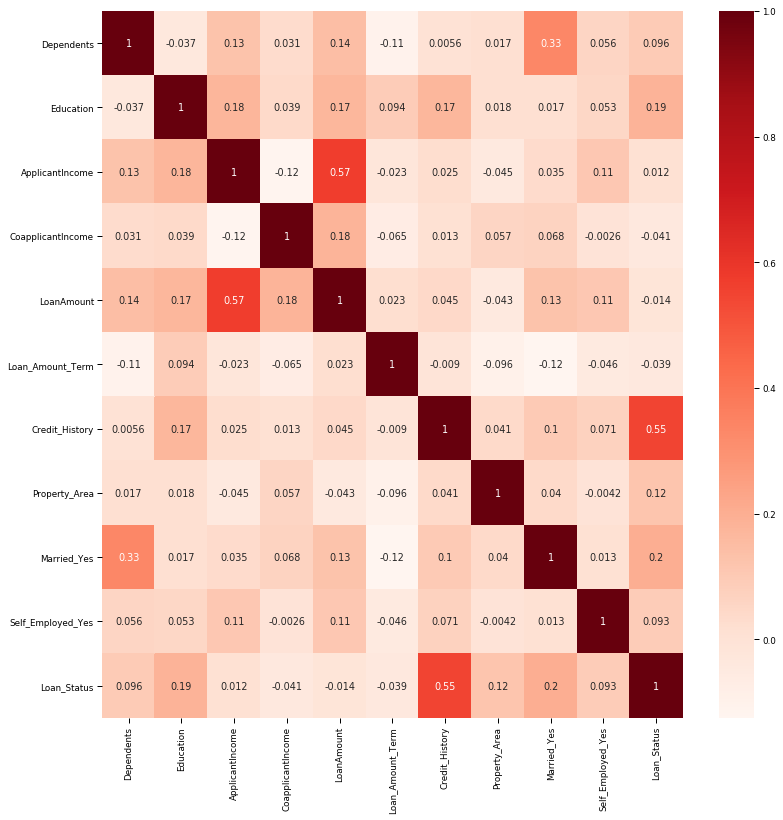

In [458]:
import seaborn as sns
plt.figure(figsize=(13,13))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.

cor = X_train_act.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [459]:
X_train_act = X_train_act.drop(["ApplicantIncome","Loan_Status"],axis = 1)
X_test_act = X_test_act.drop(["ApplicantIncome"],axis = 1)

In [461]:
from sklearn.preprocessing import StandardScaler
std_ = StandardScaler()
numeric_list = ["Dependents","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
X_train_act[numeric_list] = std_.fit_transform(X_train_act[numeric_list])
X_test_act[numeric_list] = std_.transform(X_test_act[numeric_list])



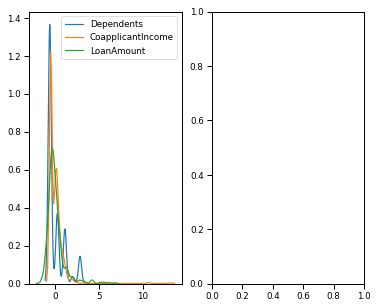

In [462]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
sns.kdeplot(X_train_act["Dependents"],ax = ax1)
sns.kdeplot(X_train_act["CoapplicantIncome"],ax = ax1)
sns.kdeplot(X_train_act["LoanAmount"],ax = ax1)
#sns.kdeplot(X_train_act["Loan_Amount_Term"],ax = ax1)





In [463]:
X_train_act.head()

Dependents  Education  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0   -0.639872          1           0.720621   -0.335997          0.273136   
1    2.826948          1          -0.529287   -0.594423          0.273136   
2   -0.639872          0           0.606364    0.217773         -2.615224   
3    0.226833          1          -0.529287    0.008294          0.273136   
4   -0.639872          1          -0.529287   -0.385221          0.273136   

   Credit_History  Property_Area  Married_Yes  Self_Employed_Yes  
0             1.0              2            1                  0  
1             1.0              2            1                  0  
2             0.0              0            1                  1  
3             0.0              0            1                  0  
4             0.0              1            0                  0

In [464]:
X_train_act.dtypes

Dependents           float64
Education              int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Married_Yes            uint8
Self_Employed_Yes      uint8
dtype: object

In [465]:
oversampled_train['ApplicantIncome'].value_counts().max()

9

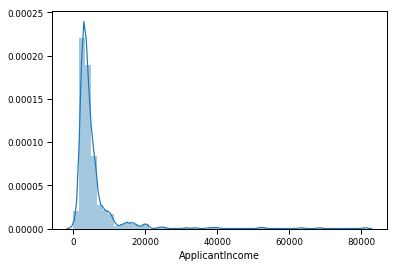

In [466]:

sns.distplot(oversampled_train['ApplicantIncome'])

In [328]:
l = [1, 3, 2, 1, 3]


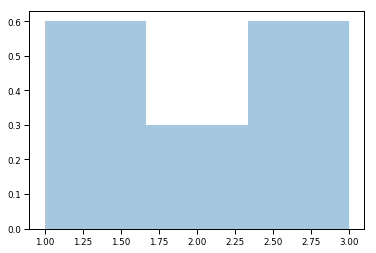

In [207]:
sns.distplot(l, kde=False, norm_hist=True, bins=3)


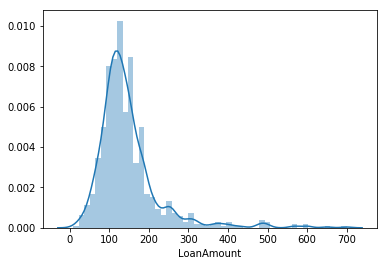

In [1121]:
sns.distplot(oversampled_train['LoanAmount',])

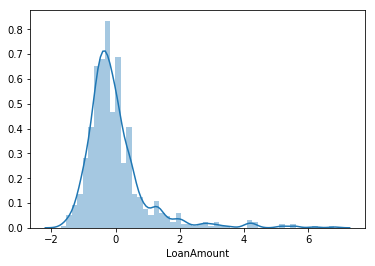

In [1122]:
sns.distplot(X_train_act['LoanAmount'].des)

In [1123]:
X_train_act['LoanAmount'].max()

6.801482947779669

In [1124]:
X_train_act.head()

Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0   -0.639872          1        -0.458698           0.720621   -0.335997   
1    2.826948          1        -0.376700          -0.529287   -0.594423   
2   -0.639872          0        -0.441803           0.606364    0.217773   
3    0.226833          1        -0.079707          -0.529287    0.008294   
4   -0.639872          1        -0.200457          -0.529287   -0.385221   

   Loan_Amount_Term  Credit_History  Property_Area  Married_Yes  \
0          0.273136             1.0              2            1   
1          0.273136             1.0              2            1   
2         -2.615224             0.0              0            1   
3          0.273136             0.0              0            1   
4          0.273136             0.0              1            0   

   Self_Employed_Yes  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0

In [1125]:
X_test_act.head()

Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0   -0.639872          1         0.060419          -0.529287   -0.188325   
1    0.226833          1        -0.135820          -0.032748   -0.237549   
2   -0.639872          1        -0.381195          -0.529287   -1.000521   
3   -0.639872          0        -0.445833           0.247131   -0.335997   
4   -0.639872          1         0.083825          -0.529287   -0.077571   

   Loan_Amount_Term  Credit_History  Property_Area  Married_Yes  \
0          0.273136             1.0              2            0   
1          0.273136             1.0              0            1   
2          0.273136             1.0              2            1   
3          0.273136             1.0              2            1   
4          0.273136             1.0              2            0   

   Self_Employed_Yes  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0

In [117]:
y_train_act.value_counts()

1    384
0    384
Name: Loan_Status, dtype: int64

# Logistic Regression

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
classifier = LogisticRegression(random_state = 0,C = 0.01,penalty = "elasticnet",solver ="saga",l1_ratio =0.1)
classifier.fit(X_train_act,y_train_act)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.1, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=0, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [469]:
#training Accuracy
predict_train = classifier.predict(X_train_act)
print("training accuracy",accuracy_score(predict_train,y_train_act))


training accuracy 0.765625


In [472]:
test["Loan_status_val"] = label_encoder.inverse_transform(predict_test)


In [474]:
test.values.tolist()

[[0, 1, 5849, 0, 132.0, 360.0, 1.0, 2, 1, 0, 0, 'Y'],
 [1, 1, 4583, 1508, 128.0, 360.0, 1.0, 0, 0, 1, 0, 'Y'],
 [0, 1, 3000, 0, 66.0, 360.0, 1.0, 2, 1, 1, 1, 'Y'],
 [0, 0, 2583, 2358, 120.0, 360.0, 1.0, 2, 1, 1, 0, 'Y'],
 [0, 1, 6000, 0, 141.0, 360.0, 1.0, 2, 1, 0, 0, 'Y'],
 [2, 1, 5417, 4196, 267.0, 360.0, 1.0, 2, 1, 1, 1, 'Y'],
 [0, 0, 2333, 1516, 95.0, 360.0, 1.0, 2, 1, 1, 0, 'Y'],
 [4, 1, 3036, 2504, 158.0, 360.0, 0.0, 1, 0, 1, 0, 'N'],
 [2, 1, 4006, 1526, 168.0, 360.0, 1.0, 2, 1, 1, 0, 'Y'],
 [1, 1, 12841, 10968, 349.0, 360.0, 1.0, 1, 0, 1, 0, 'Y'],
 [2, 1, 3200, 700, 70.0, 360.0, 1.0, 2, 1, 1, 0, 'Y'],
 [2, 1, 2500, 1840, 109.0, 360.0, 1.0, 2, 1, 1, 0, 'Y'],
 [2, 1, 3073, 8106, 200.0, 360.0, 1.0, 2, 1, 1, 0, 'Y'],
 [0, 1, 1853, 2840, 114.0, 360.0, 1.0, 0, 0, 0, 0, 'N'],
 [2, 1, 1299, 1086, 17.0, 120.0, 1.0, 2, 1, 1, 0, 'Y'],
 [0, 1, 4950, 0, 125.0, 360.0, 1.0, 2, 1, 0, 0, 'Y'],
 [1, 0, 3596, 0, 100.0, 240.0, 1.0, 2, 1, 0, 0, 'Y'],
 [0, 1, 3510, 0, 76.0, 360.0, 0.0, 2, 0, 0, 0, 'N

In [331]:
confusion_matrix(predict_train,y_train_act)

array([[264,  60],
       [120, 324]])

#Testing Auracy

In [470]:
predict_test = classifier.predict(X_test_act)
accuracy_score(predict_test,y_test_act)


0.7833333333333333

In [727]:
import pickle
PIK = "pickle.dat"
data = [label_encoder,sc,classifier]
with open(PIK, "wb") as f:
    pickle.dump(len(data), f)
    for value in data:
        pickle.dump(value, f)
data2 = []
with open("pickle.dat", "rb") as f:
    for _ in range(pickle.load(f)):
        data2.append(pickle.load(f))

In [752]:
# sc.inverse_transform(X_train_act[numerical_train].iloc[59].values)
# print([0.0000e+00, 1.0000e+00, 1.0408e+04, 0.0000e+00, 2.5900e+02,
#        3.6000e+02, 1.0000e+00, 2.0000e+00])

array([0.0000e+00, 1.0000e+00, 1.0408e+04, 0.0000e+00, 2.5900e+02,
       3.6000e+02, 1.0000e+00, 2.0000e+00])

# Random Forest Classifier

In [149]:
model = RandomForestClassifier(n_estimators = 200,criterion = 'gini', random_state = 42)
model.fit(X_train_act, y_train_act)

print("training accuracy",accuracy_score(model.predict(X_train_act),y_train_act))


predict = model.predict(X_test_act)
print('The accuracy of Random Forest Classifier is: ', accuracy_score(predict, y_test_act))

training accuracy 1.0
The accuracy of Random Forest Classifier is:  0.7


In [1135]:
X_train_act.head()

Dependents  Education  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0   -0.639872          1        -0.458698           0.720621   -0.335997   
1    2.826948          1        -0.376700          -0.529287   -0.594423   
2   -0.639872          0        -0.441803           0.606364    0.217773   
3    0.226833          1        -0.079707          -0.529287    0.008294   
4   -0.639872          1        -0.200457          -0.529287   -0.385221   

   Loan_Amount_Term  Credit_History  Property_Area  Married_Yes  \
0          0.273136             1.0              2            1   
1          0.273136             1.0              2            1   
2         -2.615224             0.0              0            1   
3          0.273136             0.0              0            1   
4          0.273136             0.0              1            0   

   Self_Employed_Yes  
0                  0  
1                  0  
2                  1  
3                  0  
4                  0

# GridSearchCV

In [333]:
params = {'n_estimators': [50, 100, 200, 400, 600, 800,1000,1100]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params,
                                   scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_act, y_train_act)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 1100}
0.7995670995670996


In [334]:
grid_search.best_estimator_.fit(X_train_act, y_train_act)
#training Accuracy
predict_train = model.predict(X_train_act)
print("training accuracy",accuracy_score(predict_train,y_train_act))

predict = model.predict(X_test_act)
print('The accuracy of Random forest classifier with best estimator value: ',accuracy_score(predict, y_test_act))

training accuracy 1.0
The accuracy of Random forest classifier with best estimator value:  0.7


In [1216]:
confusion_matrix(predict,y_test_act)

array([[ 8,  4],
       [14, 34]])

# AdaBoostClassifier

In [335]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier(n_estimators=800)
adaboost.fit(X_train_act,y_train_act)
#training Accuracy
predict_train = adaboost.predict(X_train_act)
print("training accuracy",accuracy_score(predict_train,y_train_act))

predict = adaboost.predict(X_test_act)
print('The accuracy of Random forest classifier with best estimator value: ',accuracy_score(predict, y_test_act))


training accuracy 0.8854166666666666
The accuracy of Random forest classifier with best estimator value:  0.75


In [336]:
confusion_matrix(adaboost.predict(X_train_act),y_train_act)

array([[321,  25],
       [ 63, 359]])

In [337]:
import pickle
PIK = "pickle.dat"
data = [label_encoder,std_,adaboost]
with open(PIK, "wb") as f:
    pickle.dump(len(data), f)
    for value in data:
        pickle.dump(value, f)
data2 = []
with open("pickle.dat", "rb") as f:
    for _ in range(pickle.load(f)):
        data2.append(pickle.load(f))

In [154]:
grid_search = GridSearchCV(AdaBoostClassifier(), param_grid=params,
                                   scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train_act, y_train_act)

grid_search.best_estimator_.fit(X_train_act, y_train_act)
#training Accuracy
predict_train = model.predict(X_train_act)
print("training accuracy",accuracy_score(predict_train,y_train_act))

predict = model.predict(X_test_act)
print('The accuracy of Random forest classifier with best estimator value: ',accuracy_score(predict, y_test_act))


training accuracy 1.0
The accuracy of Random forest classifier with best estimator value:  0.7


In [1225]:
!pip install lightgbm

     |████████████████████████████████| 1.2MB 415kB/s eta 0:00:01


In [155]:
from lightgbm import LGBMClassifier
lgbm=LGBMClassifier()
lgbm.fit(X_train_act,y_train_act)
predict_train = lgbm.predict(X_train_act)
print("training accuracy",accuracy_score(predict_train,y_train_act))


training accuracy 0.98046875


In [156]:
predict = lgbm.predict(X_test_act)
print('The accuracy of Random forest classifier with best estimator value: ',accuracy_score(predict, y_test_act))


The accuracy of Random forest classifier with best estimator value:  0.7166666666666667
